In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Descriptive statisitcs**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/BUSAN 302 - Group/Heart Disease.csv')

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Look at each variable, also look at the heart text file to understand the variables. Present a reasonable amount of information to your client so that a
technically minded person can understand the data you used and ask questions. You want to explain what you think is essential to your client but not overwhelm them with trivial details. (look at df.describe)




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Analysis
Data exploration: there are 4238 rows and 16 rows. The education, totChol, BMI,cigsPerDay, glucose, heartrate and glucose all contain some missing values. The heart rate missing value in heart rate and BMI are miniscule so we can simply remove this one row. The other columns will need to be cleaned

In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The average age is 50m 70 is the max age and 32 in minimum. Age ranges from 32-70. The average amount of cigarretees consumed in a day is 9. Average BMI is 25.8%, average heart rate is 75bpm

Exploratory Data Analysis

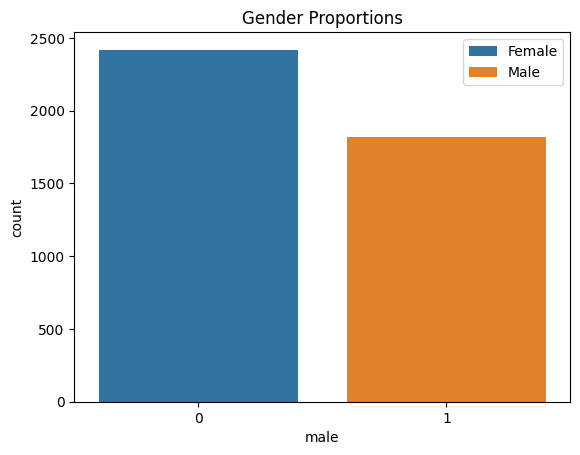

In [5]:
#Gender proportions

sns.countplot(x='male', data=df, hue = 'male')
plt.title('Gender Proportions')
plt.legend(['Female', 'Male'])
plt.show()

There are more females than males in this dataset, approximately 2400 females and 1750 males

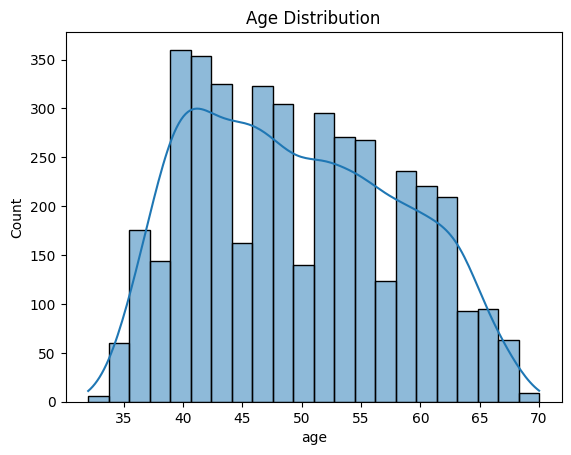

In [6]:
#Age distribution

sns.histplot(df['age'], kde = True)
plt.title('Age Distribution')
plt.show()

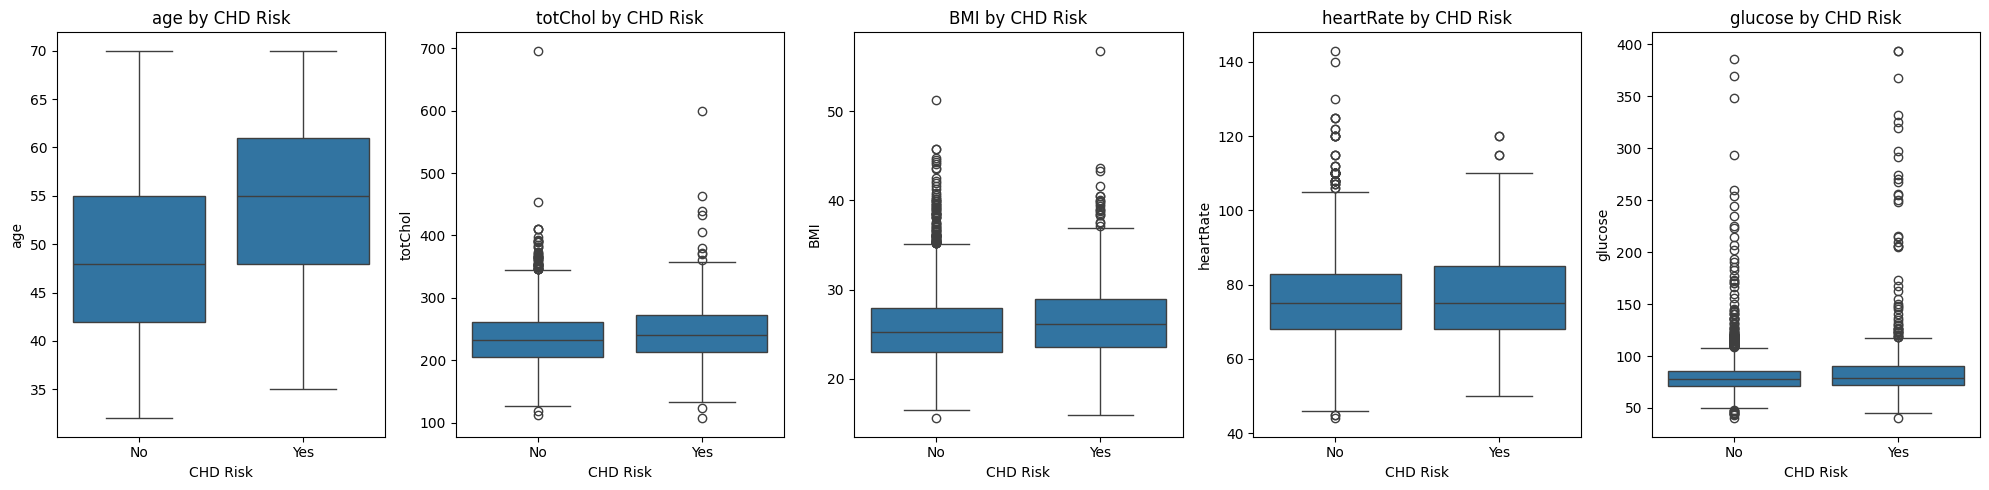

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric y-variables
y_vars = ['age',  'totChol', 'BMI', 'heartRate', 'glucose']
x_var = 'TenYearCHD'

# Set up subplots: 1 row, len(y_vars) columns
fig, axes = plt.subplots(1, len(y_vars), figsize=(4 * len(y_vars), 5), sharex=True, sharey=False)

for i, y in enumerate(y_vars):
    ax = axes[i]
    sns.boxplot(x=x_var, y=y, data=df, ax=ax)
    ax.set_title(f'{y} by CHD Risk')
    ax.set_xlabel('CHD Risk')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()


We will include the numeric variables Age and BMI, as these appear to be the only variables showing a difference between individuals with and without CHD risk. For example, the CHD group tends to be older on average and has a slightly higher BMI.

The other numeric variables look extremely simialr across both CHD groups indicating nothing is going on.



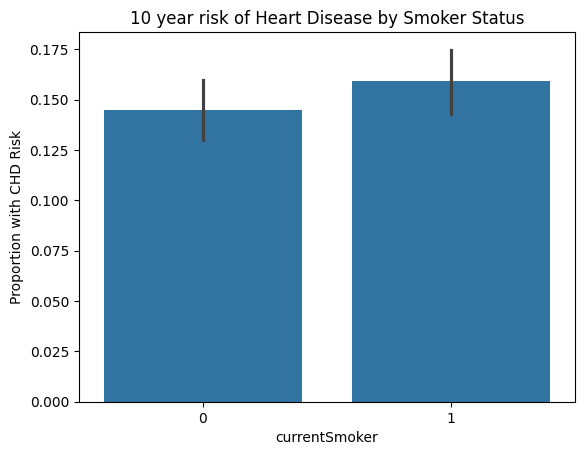

In [8]:
sns.barplot(x='currentSmoker', y='TenYearCHD', data=df)
plt.title('10 year risk of Heart Disease by Smoker Status')
plt.ylabel('Proportion with CHD Risk')
plt.show()

We will not include "current smoker", but we will include numbr of "Cigerettes per day". These two variables will result in multicollinearity amoung our independant varibles if we have both (e.g. one explains the other).

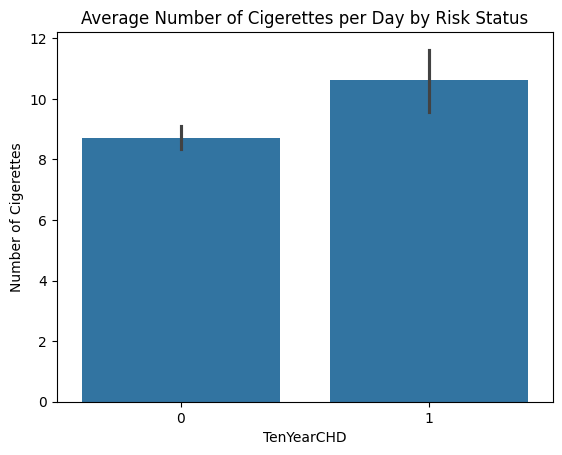

In [9]:
sns.barplot(x='TenYearCHD', y='cigsPerDay', data=df)
plt.title('Average Number of Cigerettes per Day by Risk Status')
plt.ylabel('Number of Cigerettes')
plt.show()

The average number of cigerettes is higher for those who are at risk, hence why we will keep this in our model.

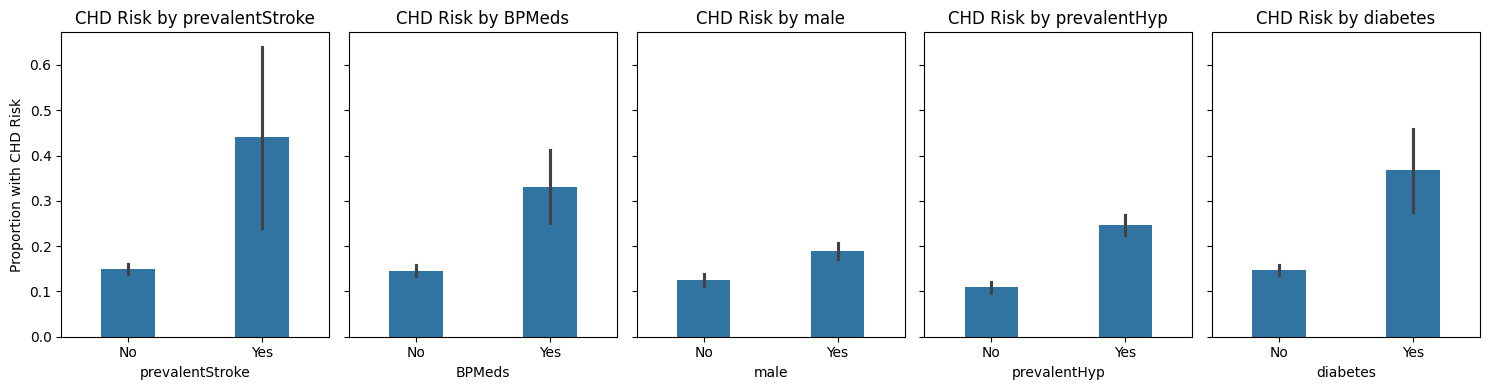

In [10]:


x_vars = ['prevalentStroke','BPMeds' ,'male', 'prevalentHyp', 'diabetes']
y_var = 'TenYearCHD'

fig, axes = plt.subplots(1, len(x_vars), figsize=(3 * len(x_vars), 4), sharey=True)

for i, x in enumerate(x_vars):
    ax = axes[i]
    sns.barplot(x=x, y=y_var, data=df, ax=ax)
    ax.set_title(f'CHD Risk by {x}')
    ax.set_xlabel(x)
    ax.set_ylabel('Proportion with CHD Risk' if i == 0 else '')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])

    # Make bars skinnier and properly centered
    for bar in ax.patches:
        center = bar.get_x() + bar.get_width() / 2
        new_width = 0.4
        bar.set_width(new_width)
        bar.set_x(center - new_width / 2)

plt.tight_layout()
plt.show()

* Prevalent Stroke: whether or not the patient had previously had a stroke
* BP Meds: whether or not the patient was on blood pressure medication
* Prevalent Hyp: whether or not the patient was hypertensive


Prevalent Stroke, BP medication, gender, Hypertensive, and diabetes will be included in our model. This is becuse each other these variables have one group showing a higher proportion of those with 10 year CHD risk.  



Text(0, 0.5, 'Diastolic Blood Pressure')

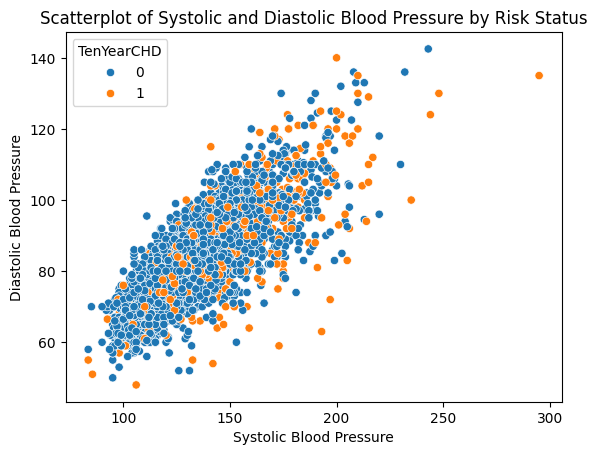

In [11]:
sns.scatterplot(x='sysBP', y='diaBP', data=df, hue='TenYearCHD')
plt.title('Scatterplot of Systolic and Diastolic Blood Pressure by Risk Status')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')

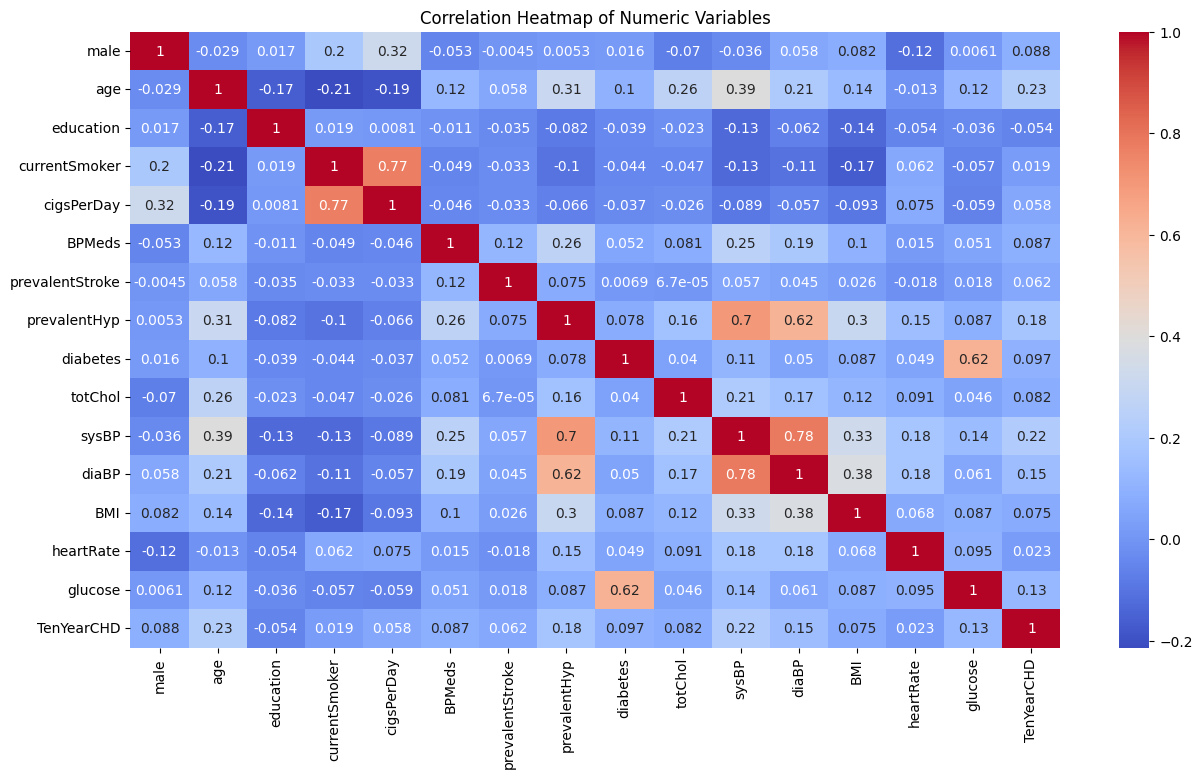

In [12]:
plt.figure(figsize=(15, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()



Although messy, the heatmap shows us variables that are correlated with each other. As expected the two smoking variables are correlated (0.7) hence why we are keeping only one. Other Variables such as hypertension and the blood pressure variables are correlated too which will be imporant to keep in mind when creating our models.

#**Data Pre-Processing**

We will be dropping the variables smoker status, glucose, heart rate, and total cholesterol.
We will also remove education, as there is no metadata available to interpret what the numeric values represent, meaning we cannot draw meaningful conclusions from this variable.

These variables are being removed because the exploratory data analysis suggests they do not have a significant impact on the variable of interest — 10-year CHD risk.

In [13]:

print(df.columns)
df1 = df.drop(columns=['currentSmoker', 'glucose', 'heartRate', 'totChol', 'education'])

df1.head()


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,TenYearCHD
0,1,39,0.0,0.0,0,0,0,106.0,70.0,26.97,0
1,0,46,0.0,0.0,0,0,0,121.0,81.0,28.73,0
2,1,48,20.0,0.0,0,0,0,127.5,80.0,25.34,0
3,0,61,30.0,0.0,0,1,0,150.0,95.0,28.58,1
4,0,46,23.0,0.0,0,0,0,130.0,84.0,23.10,0


In [14]:
print(df1.info())

print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   cigsPerDay       4209 non-null   float64
 3   BPMeds           4185 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   sysBP            4238 non-null   float64
 8   diaBP            4238 non-null   float64
 9   BMI              4219 non-null   float64
 10  TenYearCHD       4238 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 364.3 KB
None
male                0
age                 0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
sysBP               0
diaBP               0
BMI                19
TenYearCHD        

There are a few missing observations within a couple variables. Due to the data set being so large we can afford to drop the patients who have incomplete data.

In [15]:
df1.dropna(inplace=True)

print(df1.info())

df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   int64  
 1   age              4137 non-null   int64  
 2   cigsPerDay       4137 non-null   float64
 3   BPMeds           4137 non-null   float64
 4   prevalentStroke  4137 non-null   int64  
 5   prevalentHyp     4137 non-null   int64  
 6   diabetes         4137 non-null   int64  
 7   sysBP            4137 non-null   float64
 8   diaBP            4137 non-null   float64
 9   BMI              4137 non-null   float64
 10  TenYearCHD       4137 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 387.8 KB
None


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,TenYearCHD
0,1,39,0.0,0.0,0,0,0,106.0,70.0,26.97,0
1,0,46,0.0,0.0,0,0,0,121.0,81.0,28.73,0
2,1,48,20.0,0.0,0,0,0,127.5,80.0,25.34,0
3,0,61,30.0,0.0,0,1,0,150.0,95.0,28.58,1
4,0,46,23.0,0.0,0,0,0,130.0,84.0,23.10,0


So now we do not have missing values. Next I will account for outliers

In [16]:
df1.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,TenYearCHD
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,0.431472,49.527194,9.028765,0.029732,0.005318,0.309403,0.025381,132.269398,82.890863,25.804402,0.150109
std,0.495342,8.551912,11.926309,0.169867,0.072738,0.462303,0.157298,21.925637,11.862057,4.079231,0.357221
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,15.540000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,75.000000,23.070000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,82.000000,25.410000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,143.500000,89.500000,28.040000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,295.000000,142.500000,56.800000,1.000000


Notice how the MAX of cigerattes a day is 70. This is likley an input error as smoking 70 cigerattes daily does not seem possible. However lets inspect the data further.


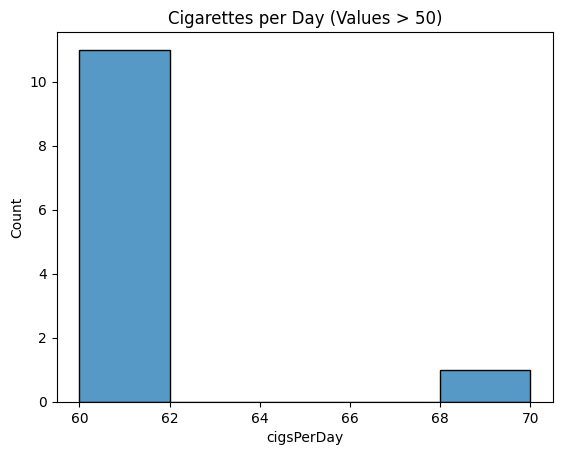

In [17]:
# Filter the values greater than 50
filtered_data = df1[df1['cigsPerDay'] > 50]

# Plot
sns.histplot(filtered_data['cigsPerDay'])
plt.title('Cigarettes per Day (Values > 50)')
plt.show()

We can see that there are quite a few observations where individuals smoke more than 35 cigarettes a day, including over 10 observations of people smoking 60 per day. Because of these, a single value of 70 is not far-fetched and aligns with the right-skewed nature of the variable. This observation will be retained.

After reviewing the variable descriptions and conducting additional research (e.g., on BMI and blood pressure), all other variables appear to fall within expected ranges and do not raise any concerns.

**Logistic regression**

Using all our variables (scaled)

In [18]:
X = df1[['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'BMI']]
Y = df1[['TenYearCHD']]


#Scale our X variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())



from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=23)

       male       age  cigsPerDay  prevalentStroke  prevalentHyp  diabetes  \
0  1.147888 -1.231124   -0.757138        -0.073118     -0.669345 -0.161374   
1 -0.871165 -0.412495   -0.757138        -0.073118     -0.669345 -0.161374   
2  1.147888 -0.178601    0.920030        -0.073118     -0.669345 -0.161374   
3 -0.871165  1.341711    1.758614        -0.073118      1.493998 -0.161374   
4 -0.871165 -0.412495    1.171605        -0.073118     -0.669345 -0.161374   

     BPMeds       BMI  
0 -0.175051  0.285774  
1 -0.175051  0.717280  
2 -0.175051 -0.113859  
3 -0.175051  0.680504  
4 -0.175051 -0.663049  


In [19]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state=0, class_weight='balanced')
#Due to the fact positive cases of CHD are vastly outnumbered by negitive cases it is very important that the class weight is balanced. Otherwise our model will have biased predictions towards the majoirty class.

model = regressor.fit(X_train, Y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[702 356]
 [ 49 135]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.78      1058
           1       0.27      0.73      0.40       184

    accuracy                           0.67      1242
   macro avg       0.60      0.70      0.59      1242
weighted avg       0.84      0.67      0.72      1242



Alright recall score (0.71) , bad precision score (0.29).

Try with less variables (without diabetes and BMI)


In [21]:
X = df1[['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'BPMeds']]
Y = df1[['TenYearCHD']]


#Scale our X variables

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())



X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state=23)

       male       age  cigsPerDay  prevalentStroke  prevalentHyp    BPMeds
0  1.147888 -1.231124   -0.757138        -0.073118     -0.669345 -0.175051
1 -0.871165 -0.412495   -0.757138        -0.073118     -0.669345 -0.175051
2  1.147888 -0.178601    0.920030        -0.073118     -0.669345 -0.175051
3 -0.871165  1.341711    1.758614        -0.073118      1.493998 -0.175051
4 -0.871165 -0.412495    1.171605        -0.073118     -0.669345 -0.175051


In [22]:
regressor = LogisticRegression(random_state=0, class_weight='balanced')

model = regressor.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[912 491]
 [ 69 183]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1403
           1       0.27      0.73      0.40       252

    accuracy                           0.66      1655
   macro avg       0.60      0.69      0.58      1655
weighted avg       0.83      0.66      0.71      1655



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Clustering**

KNN

In [23]:
X = df1[['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'BMI']]
Y = df1[['TenYearCHD']]


#Scale our X variables

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=23)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train.values)

Y_pred = knn.predict(X_test)


print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[996  62]
 [155  29]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1058
           1       0.32      0.16      0.21       184

    accuracy                           0.83      1242
   macro avg       0.59      0.55      0.56      1242
weighted avg       0.78      0.83      0.80      1242



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Means

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df1["TenYearCHD"], kmeans.labels_))

print(classification_report(df1["TenYearCHD"], kmeans.labels_))

[[2005 1511]
 [ 370  251]]
              precision    recall  f1-score   support

           0       0.84      0.57      0.68      3516
           1       0.14      0.40      0.21       621

    accuracy                           0.55      4137
   macro avg       0.49      0.49      0.45      4137
weighted avg       0.74      0.55      0.61      4137

